**step-1**

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_theme(color_codes=True) # To get different different colors
pd.set_option('display.max_columns',None) # To display the max columns
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,precision_score,recall_score,classification_report,roc_auc_score,roc_curve,auc
from sklearn.metrics import confusion_matrix,ConfusionMatrixDisplay

**step-2**

**READ THE DATA**

In [2]:
pd.read_csv(r"C:\Users\saiprithi\Downloads\preprocessd_data.csv")

,gender,age,no_of_days_subscribed,multi_screen,mail_subscribed,weekly_mins_watched,minimum_daily_mins,weekly_max_night_mins,videos_watched,customer_support_calls,churn
0,0,-0.264643,-0.946659,0,0,-1.508785,0.722258,-0.944404,-1.403000,-0.415473,0
1,0,0.029654,1.235009,0,0,0.304821,-0.901748,-0.688523,-0.599124,0.347522,0
2,0,2.580235,0.658246,0,0,-2.266627,0.613991,-0.483818,-1.403000,2.636507,1
3,0,-1.441834,0.783629,0,1,0.638123,-0.252146,0.079121,-0.197185,1.110517,0
4,0,0.127754,2.288228,0,0,-0.333851,0.253101,-0.893228,1.008630,-0.415473,0
...,...,...,...,...,...,...,...,...,...,...,...
3401,1,-0.805656,0.479710,0,0,0.887802,0.552184,0.865765,-0.495634,-0.415473,1
3402,0,0.477826,0.674425,0,0,2.038061,-0.931071,0.567257,2.100185,0.235227,1
3403,0,-0.550521,0.426099,0,1,-0.410669,0.344847,-0.729485,-0.403904,1.873512,1
3404,0,0.004651,-0.444637,0,0,1.359751,-0.847121,-0.715010,-0.197185,-1.178468,1


In [3]:
data=pd.read_csv(r"C:\Users\saiprithi\Downloads\preprocessd_data.csv")
x=data.drop('churn',axis=1)
y=data['churn']
x.shape,y.shape

((3406, 10), (3406,))

In [4]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=1234)
x_train.shape,x_test.shape,y_train.shape,y_test.shape

((2724, 10), (682, 10), (2724,), (682,))

In [5]:
from sklearn.model_selection import GridSearchCV,cross_val_score
from sklearn.tree import DecisionTreeClassifier
grid_tree=DecisionTreeClassifier()
grid_tree

DecisionTreeClassifier()

In [6]:
grid_tree.get_params()

{'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': None,
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'monotonic_cst': None,
 'random_state': None,
 'splitter': 'best'}

In [28]:
param_grid={
    'criterion':['gini','entropy'],
    'max_depth':[3,4,5,6,7,8],
    'min_samples_split':[2,3,4],
    'min_samples_leaf':[1,2,3,4],
    'random_state':[0,42]
}
param_grid

{'criterion': ['gini', 'entropy'],
 'max_depth': [3, 4, 5, 6, 7, 8],
 'min_samples_split': [2, 3, 4],
 'min_samples_leaf': [1, 2, 3, 4],
 'random_state': [0, 42]}

In [29]:
grid_search=GridSearchCV(grid_tree, # Base model
                        param_grid, # params
                        scoring='accuracy', # metric
                         cv=5,
                         verbose=True)
# verbose=true i will show in deep learning indetail
grid_search

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [3, 4, 5, 6, 7, 8],
                         'min_samples_leaf': [1, 2, 3, 4],
                         'min_samples_split': [2, 3, 4],
                         'random_state': [0, 42]},
             scoring='accuracy', verbose=True)

In [10]:
import time
start=time.time()
grid_search.fit(x_train,y_train)
end=time.time()
print(end-start)

Fitting 5 folds for each of 288 candidates, totalling 1440 fits
40.97674751281738


C:\Users\saiprithi\AppData\Local\anaconda3\Lib\site-packages\numpy\ma\core.py:2820: RuntimeWarning: invalid value encountered in cast
  _data = np.array(data, dtype=dtype, copy=copy,


In [3]:
dir(grid_search)

NameError: name 'grid_search' is not defined

In [12]:
grid_search.best_estimator_

DecisionTreeClassifier(criterion='entropy', max_depth=8, min_samples_leaf=4,
                       random_state=0)

In [1]:
grid_search.cv_results_

NameError: name 'grid_search' is not defined

In [14]:
grid_search.cv_results_.keys()

dict_keys(['mean_fit_time', 'std_fit_time', 'mean_score_time', 'std_score_time', 'param_criterion', 'param_max_depth', 'param_min_samples_leaf', 'param_min_samples_split', 'param_random_state', 'params', 'split0_test_score', 'split1_test_score', 'split2_test_score', 'split3_test_score', 'split4_test_score', 'mean_test_score', 'std_test_score', 'rank_test_score'])

In [15]:
grid_search.param_grid

{'criterion': ['gini', 'entropy'],
 'max_depth': [3, 4, 5, 6, 7, 8],
 'min_samples_split': [2, 3, 4],
 'min_samples_leaf': [1, 2, 3, 4],
 'random_state': [0, 42]}

In [16]:
len(grid_search.cv_results_['param_criterion'].data)

288

In [17]:
len(grid_search.cv_results_['params'])

288

In [2]:
grid_search.cv_results_['split0_test_score']
# p0 p1 p2 p3=tarin p5=test
# 288 params model 288 times developed 288 accuracy

NameError: name 'grid_search' is not defined

In [19]:
print(np.max(grid_search.cv_results_['split0_test_score']))
print(np.min(grid_search.cv_results_['split0_test_score']))

0.8587155963302753
0.7908256880733945


In [20]:
param1_acc1=grid_search.cv_results_['split0_test_score'][0]
param1_acc2=grid_search.cv_results_['split1_test_score'][0]
param1_acc3=grid_search.cv_results_['split2_test_score'][0]
param1_acc4=grid_search.cv_results_['split3_test_score'][0]
param1_acc5=grid_search.cv_results_['split4_test_score'][0]
print(param1_acc1,param1_acc2,param1_acc3,param1_acc4,param1_acc5)
param_avg_acc=np.mean([param1_acc1,param1_acc2,param1_acc3,param1_acc4,param1_acc5])
print(param_avg_acc)

0.8091743119266055 0.8146788990825689 0.8220183486238533 0.8348623853211009 0.8327205882352942
0.8226909066378845


In [21]:
idx=np.argmax(grid_search.cv_results_['mean_test_score'])
grid_search.cv_results_['params'][idx]

{'criterion': 'entropy',
 'max_depth': 8,
 'min_samples_leaf': 4,
 'min_samples_split': 2,
 'random_state': 0}

In [22]:
grid_search.best_params_

{'criterion': 'entropy',
 'max_depth': 8,
 'min_samples_leaf': 4,
 'min_samples_split': 2,
 'random_state': 0}

In [23]:
best_model=grid_search.best_estimator_

In [24]:
y_pred=best_model.predict(x_test)

In [25]:
from sklearn.metrics import accuracy_score,precision_score,recall_score,f1_score
accuracy=accuracy_score(y_test,y_pred)
precision=precision_score(y_test,y_pred)
recall=recall_score(y_test,y_pred)
f1=f1_score(y_test,y_pred)
metrics=[accuracy,precision,recall,f1]
idx=['accuracy','precision','recall','f1']
pd.DataFrame(metrics,index=idx,columns=['metrics'])

,metrics
accuracy,0.865103
precision,0.879630
recall,0.843195
f1,0.861027


In [26]:
prob=best_model.predict_proba(x_test)
prob_yes=prob[:,1]

0.9085936424934636


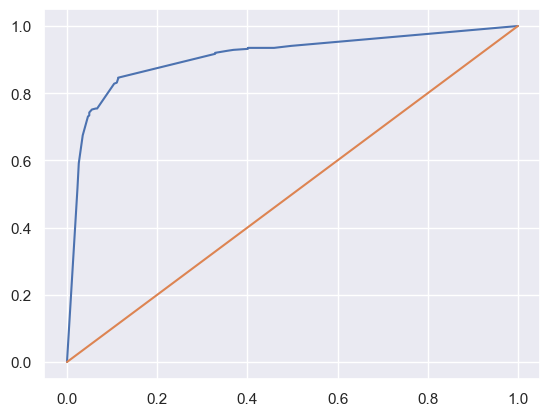

In [27]:
from sklearn.metrics import roc_auc_score,roc_curve,auc
fpr,tpr,threshold=roc_curve(y_test,prob_yes)
print(roc_auc_score(y_test,prob_yes))
plt.plot(fpr,tpr)
plt.plot([0,1],[0,1])
plt.show()